In [6]:
import tensorflow as tf
import os
from vf_tools import *
import pandas as pd

os.environ["CUDA_VISIBLE_DEVICES"]='1'
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


# load data

In [4]:
vfdata = np.load('vfdata.npy',allow_pickle=True)

In [8]:
categorical_feats = ['righteye']
numerical_feats = ['age', 'duration', 'centralval', 'centralprob', 'md', 'mdprob', 'psd', 'timegap']

test_dataset = {'age':[], 'righteye':[], 'duration':[], 'centralval':[], 'centralprob':[], 'md':[], 'mdprob':[],
               'psd':[], 'timegap':[]}
tds24_test = []
for vf in vfdata:
    age, righteye, duration, centralval, centralprob, md, mdprob, psd, timegap, tds = vf
    test_dataset['age'].append(age)
    test_dataset['righteye'].append(float(righteye))
    test_dataset['duration'].append(duration)
    test_dataset['centralval'].append(centralval)
    test_dataset['centralprob'].append(centralprob)
    test_dataset['md'].append(md)
    test_dataset['mdprob'].append(mdprob)
    test_dataset['psd'].append(psd)
    test_dataset['timegap'].append(timegap)
    
    tds24_test.append(tds)
    
vf24_pdf_test = pd.DataFrame.from_dict(test_dataset)
vf24_pdf_test[categorical_feats] = vf24_pdf_test[categorical_feats].astype(str)
vf24_pdf_test[numerical_feats] = vf24_pdf_test[numerical_feats].astype(float)
test_dataset = {}
for key, value in vf24_pdf_test.items():
    test_dataset[key] = value[:, tf.newaxis]

tds24_test = np.array(tds24_test, dtype=int)

/tmp/ipykernel_89744/29686406.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  test_dataset[key] = value[:, tf.newaxis]


# load model

In [9]:
model = tf.keras.models.load_model('results/fttransformer')

2024-03-27 21:08:42.380704: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-03-27 21:08:42.686648: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3792860000 Hz


# predict 10-2 VF

In [10]:
preds = model.predict((test_dataset, tds24_test))
vf10_pred = np.array(preds['output'])

2024-03-27 21:08:44.905311: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2024-03-27 21:08:51.535370: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2024-03-27 21:08:52.205822: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-03-27 21:08:52.733642: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


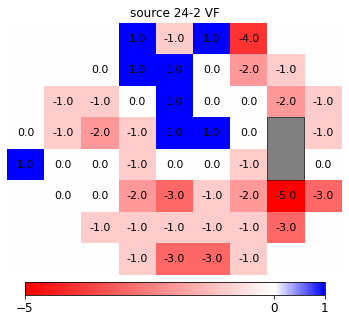

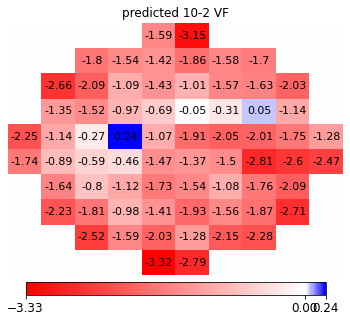

In [11]:
plot_vf(tds24_test[1], title='source 24-2 VF')
plot_vf(vf10_pred[1], title='predicted 10-2 VF')